In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | tucuman
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | boden
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | neiafu
Processing Record 13 of Set 1 | rabo de peixe
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | kupang
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | nikolskoye
Processin

Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | gilgil
City not found. Skipping...
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | cikupa
Processing Record 44 of Set 4 | atar
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | vanimo
Processing Record 48 of Set 4 | ninghai
Processing Record 49 of Set 4 | hunza
City not found. Skipping...
Processing Record 50 of Set 4 | preobrazheniye
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | shirokiy
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | borba
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | haimen
Processing Record 8 of Set 5 | soe
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | akdepe
Processing Record 11 of Set 5 | klak

Processing Record 31 of Set 8 | nhulunbuy
Processing Record 32 of Set 8 | smithers
Processing Record 33 of Set 8 | ambilobe
Processing Record 34 of Set 8 | berlevag
Processing Record 35 of Set 8 | canoinhas
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | tadine
Processing Record 40 of Set 8 | mazatlan
Processing Record 41 of Set 8 | camopi
Processing Record 42 of Set 8 | great falls
Processing Record 43 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 44 of Set 8 | maymyo
Processing Record 45 of Set 8 | san juan
Processing Record 46 of Set 8 | cherskiy
Processing Record 47 of Set 8 | lagoa
Processing Record 48 of Set 8 | wuchi
Processing Record 49 of Set 8 | mount pleasant
Processing Record 50 of Set 8 | mocajuba
Processing Record 1 of Set 9 | sitka
Processing Record 2 of Set 9 | sorland
Processing Record 3 of Set 9 | shimoda
Processing Record 4 of Set 9 | bubaque
Pro

Processing Record 17 of Set 12 | talara
Processing Record 18 of Set 12 | eisenerz
Processing Record 19 of Set 12 | nishihara
Processing Record 20 of Set 12 | conceicao do araguaia
Processing Record 21 of Set 12 | cap-aux-meules
Processing Record 22 of Set 12 | boksitogorsk
Processing Record 23 of Set 12 | mana
Processing Record 24 of Set 12 | rovaniemi
Processing Record 25 of Set 12 | karratha
Processing Record 26 of Set 12 | nabisar
Processing Record 27 of Set 12 | kaitong
Processing Record 28 of Set 12 | makat
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | gold coast
Processing Record 31 of Set 12 | visimo-utkinsk
City not found. Skipping...
Processing Record 32 of Set 12 | zenzeli
Processing Record 33 of Set 12 | xuddur
Processing Record 34 of Set 12 | bronnoysund
Processing Record 35 of Set 12 | ngunguru
Processing Record 36 of Set 12 | fallon
Processing Record 37 of Set 12 | davenda
Processing Record 38 of Set 12 | ust-kuyga
Processing Record 39 of Set 12 | 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,69,20,9.22,TO,2022-07-07 21:14:37
1,Muros,42.7762,-9.0603,74.08,67,0,12.84,ES,2022-07-07 21:14:37
2,Tucuman,-26.8241,-65.2226,59.00,33,0,4.61,AR,2022-07-07 21:14:38
3,San Patricio,28.0170,-97.5169,98.17,41,2,17.31,US,2022-07-07 21:14:38
4,Hobart,-42.8794,147.3294,46.26,91,98,1.01,AU,2022-07-07 21:14:38
5,Boden,65.8252,21.6886,55.40,74,34,5.82,SE,2022-07-07 21:14:39
6,Saint-Pierre,-21.3393,55.4781,69.91,69,0,14.97,RE,2022-07-07 21:14:39
7,Norman Wells,65.2820,-126.8329,89.83,22,3,12.44,CA,2022-07-07 21:14:39
8,Thompson,55.7435,-97.8558,80.33,26,92,4.16,CA,2022-07-07 21:11:03
9,Hilo,19.7297,-155.0900,90.28,85,100,9.22,US,2022-07-07 21:14:40


In [17]:
reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-07 21:14:37,-21.2000,-175.2000,75.36,69,20,9.22
1,Muros,ES,2022-07-07 21:14:37,42.7762,-9.0603,74.08,67,0,12.84
2,Tucuman,AR,2022-07-07 21:14:38,-26.8241,-65.2226,59.00,33,0,4.61
3,San Patricio,US,2022-07-07 21:14:38,28.0170,-97.5169,98.17,41,2,17.31
4,Hobart,AU,2022-07-07 21:14:38,-42.8794,147.3294,46.26,91,98,1.01
5,Boden,SE,2022-07-07 21:14:39,65.8252,21.6886,55.40,74,34,5.82
6,Saint-Pierre,RE,2022-07-07 21:14:39,-21.3393,55.4781,69.91,69,0,14.97
7,Norman Wells,CA,2022-07-07 21:14:39,65.2820,-126.8329,89.83,22,3,12.44
8,Thompson,CA,2022-07-07 21:11:03,55.7435,-97.8558,80.33,26,92,4.16
9,Hilo,US,2022-07-07 21:14:40,19.7297,-155.0900,90.28,85,100,9.22


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

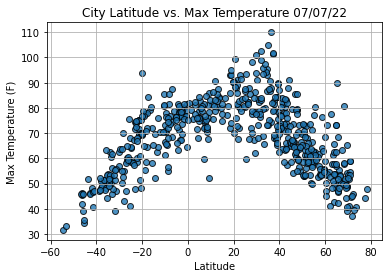

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

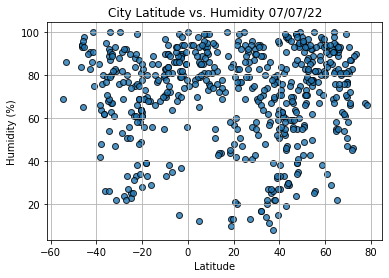

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

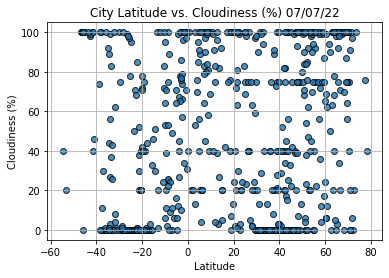

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

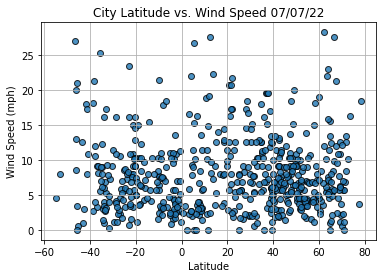

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-07-07 21:10:23
Lat                         -54.8
Lng                         -68.3
Max Temp                    31.66
Humidity                       69
Cloudiness                     40
Wind Speed                   4.61
Name: 13, dtype: object

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Muros,ES,2022-07-07 21:14:37,42.7762,-9.0603,74.08,67,0,12.84
3,San Patricio,US,2022-07-07 21:14:38,28.0170,-97.5169,98.17,41,2,17.31
5,Boden,SE,2022-07-07 21:14:39,65.8252,21.6886,55.40,74,34,5.82
7,Norman Wells,CA,2022-07-07 21:14:39,65.2820,-126.8329,89.83,22,3,12.44
8,Thompson,CA,2022-07-07 21:11:03,55.7435,-97.8558,80.33,26,92,4.16


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

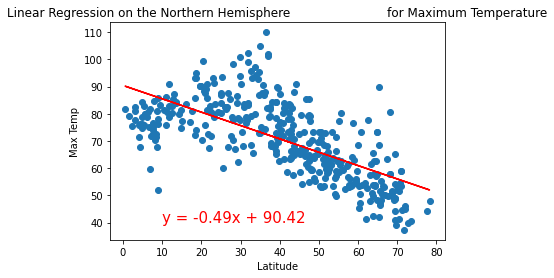

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

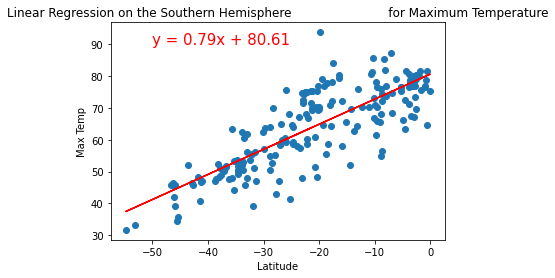

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

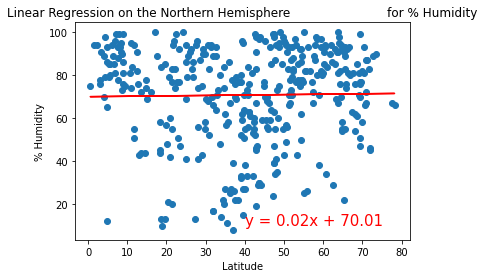

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

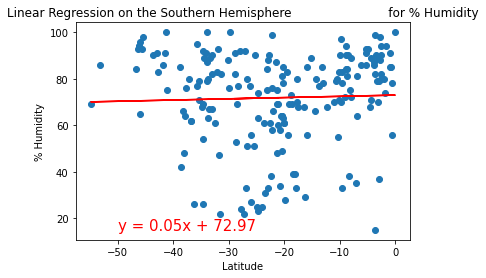

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

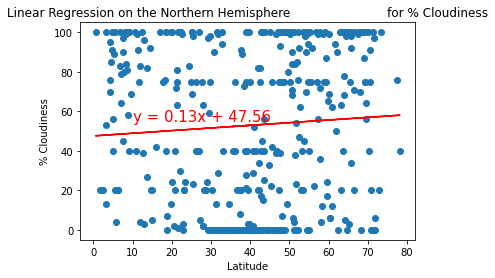

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

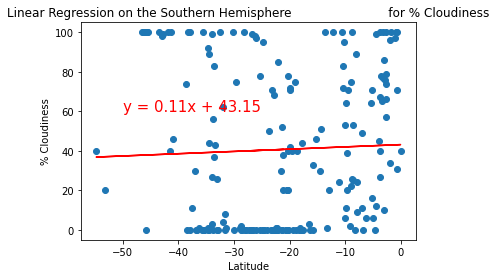

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

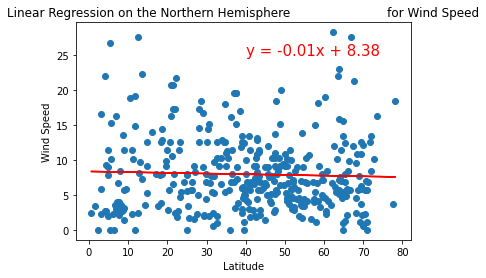

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

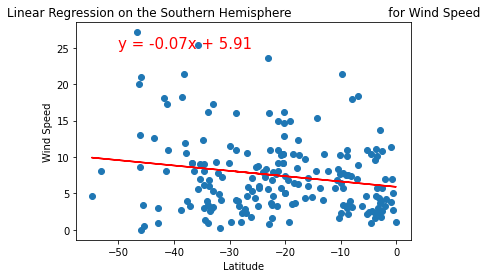

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))